In [9]:
from models import TMClassifier
from utils import get_class_translation_table
from characters import get_hiragana_characters
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the Test Data

In [10]:
x_test = np.load('k49-test-imgs.npz')['arr_0']
y_test = np.load('k49-test-labels.npz')['arr_0']

# Normalize images
x_test = x_test.astype('float32') / 255

# TM Setup 

In [15]:
tm = TMClassifier("model.pk1", get_class_translation_table())
tm.load_model()

In [ ]:
y_pred = tm.tm.predict(x_test)

# Confusion Matrix

Confusion matrix, without normalization
[[774   7   3 ...   8   4   2]
 [  9 852   0 ...   2   3   0]
 [  0   0 868 ...   0   0   0]
 ...
 [  0   1  18 ... 552  13   0]
 [  2   1  19 ...   2 720   0]
 [  0   0   5 ...   0   1 396]]


findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.


Normalized confusion matrix
[[0.774      0.007      0.003      ... 0.008      0.004      0.002     ]
 [0.009      0.852      0.         ... 0.002      0.003      0.        ]
 [0.         0.         0.868      ... 0.         0.         0.        ]
 ...
 [0.         0.001      0.018      ... 0.552      0.013      0.        ]
 [0.002      0.001      0.019      ... 0.002      0.72       0.        ]
 [0.         0.         0.0087108  ... 0.         0.00174216 0.68989547]]


findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not

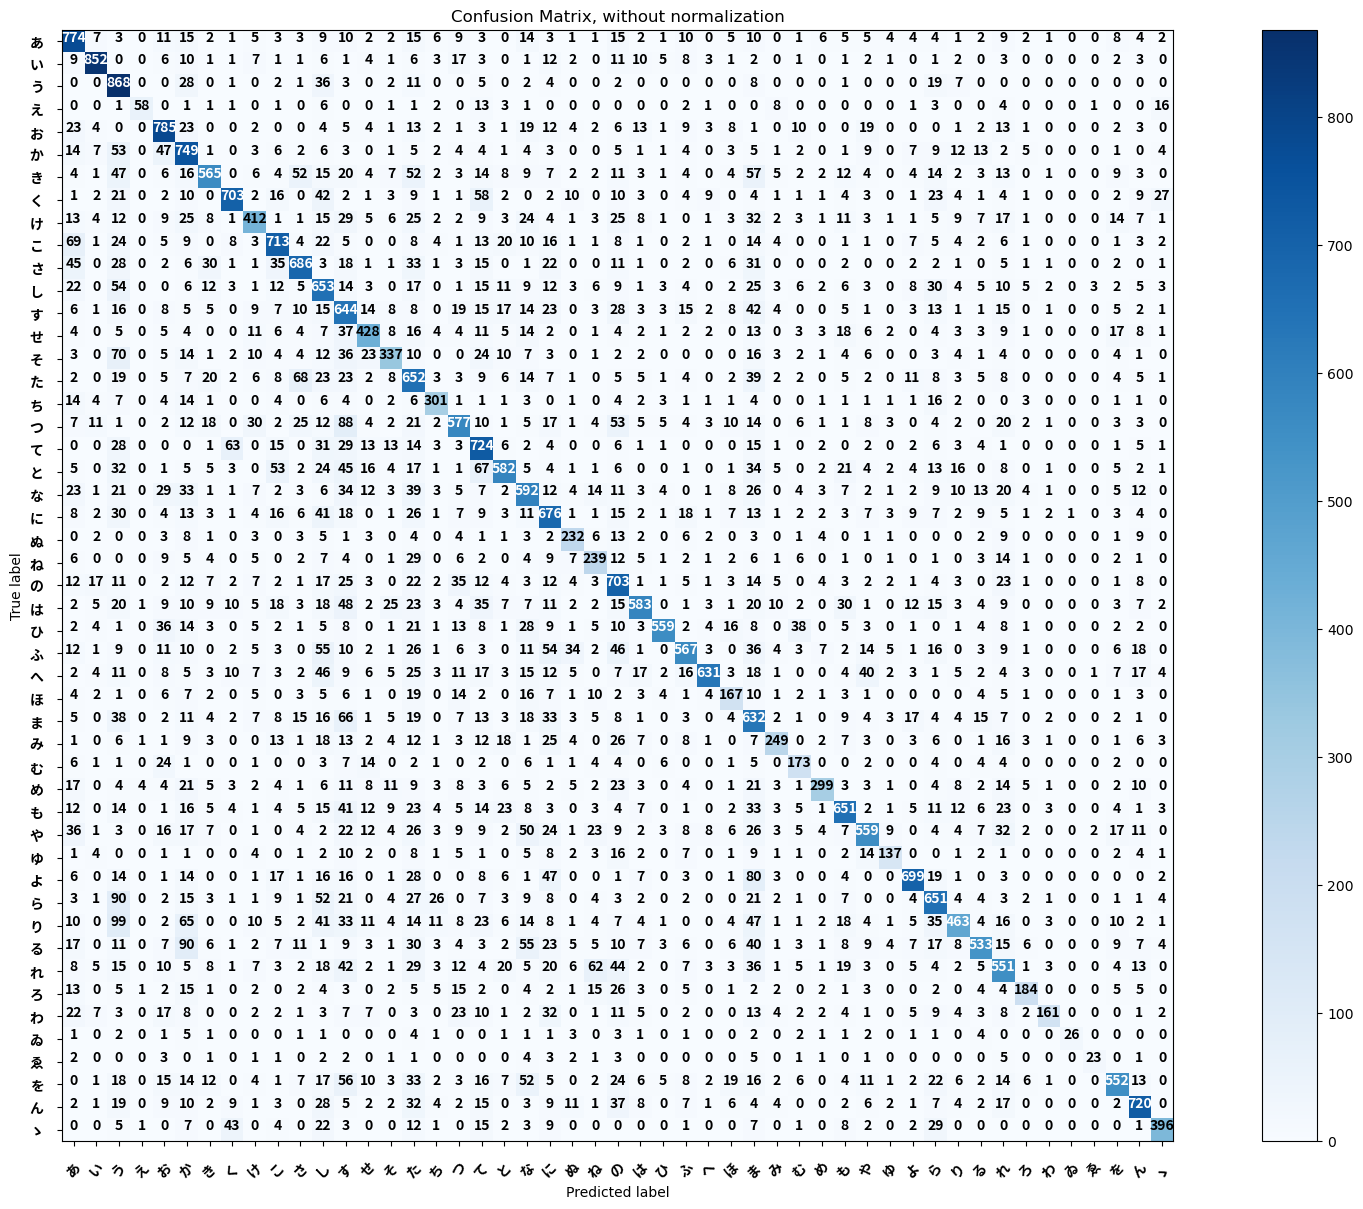

findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not

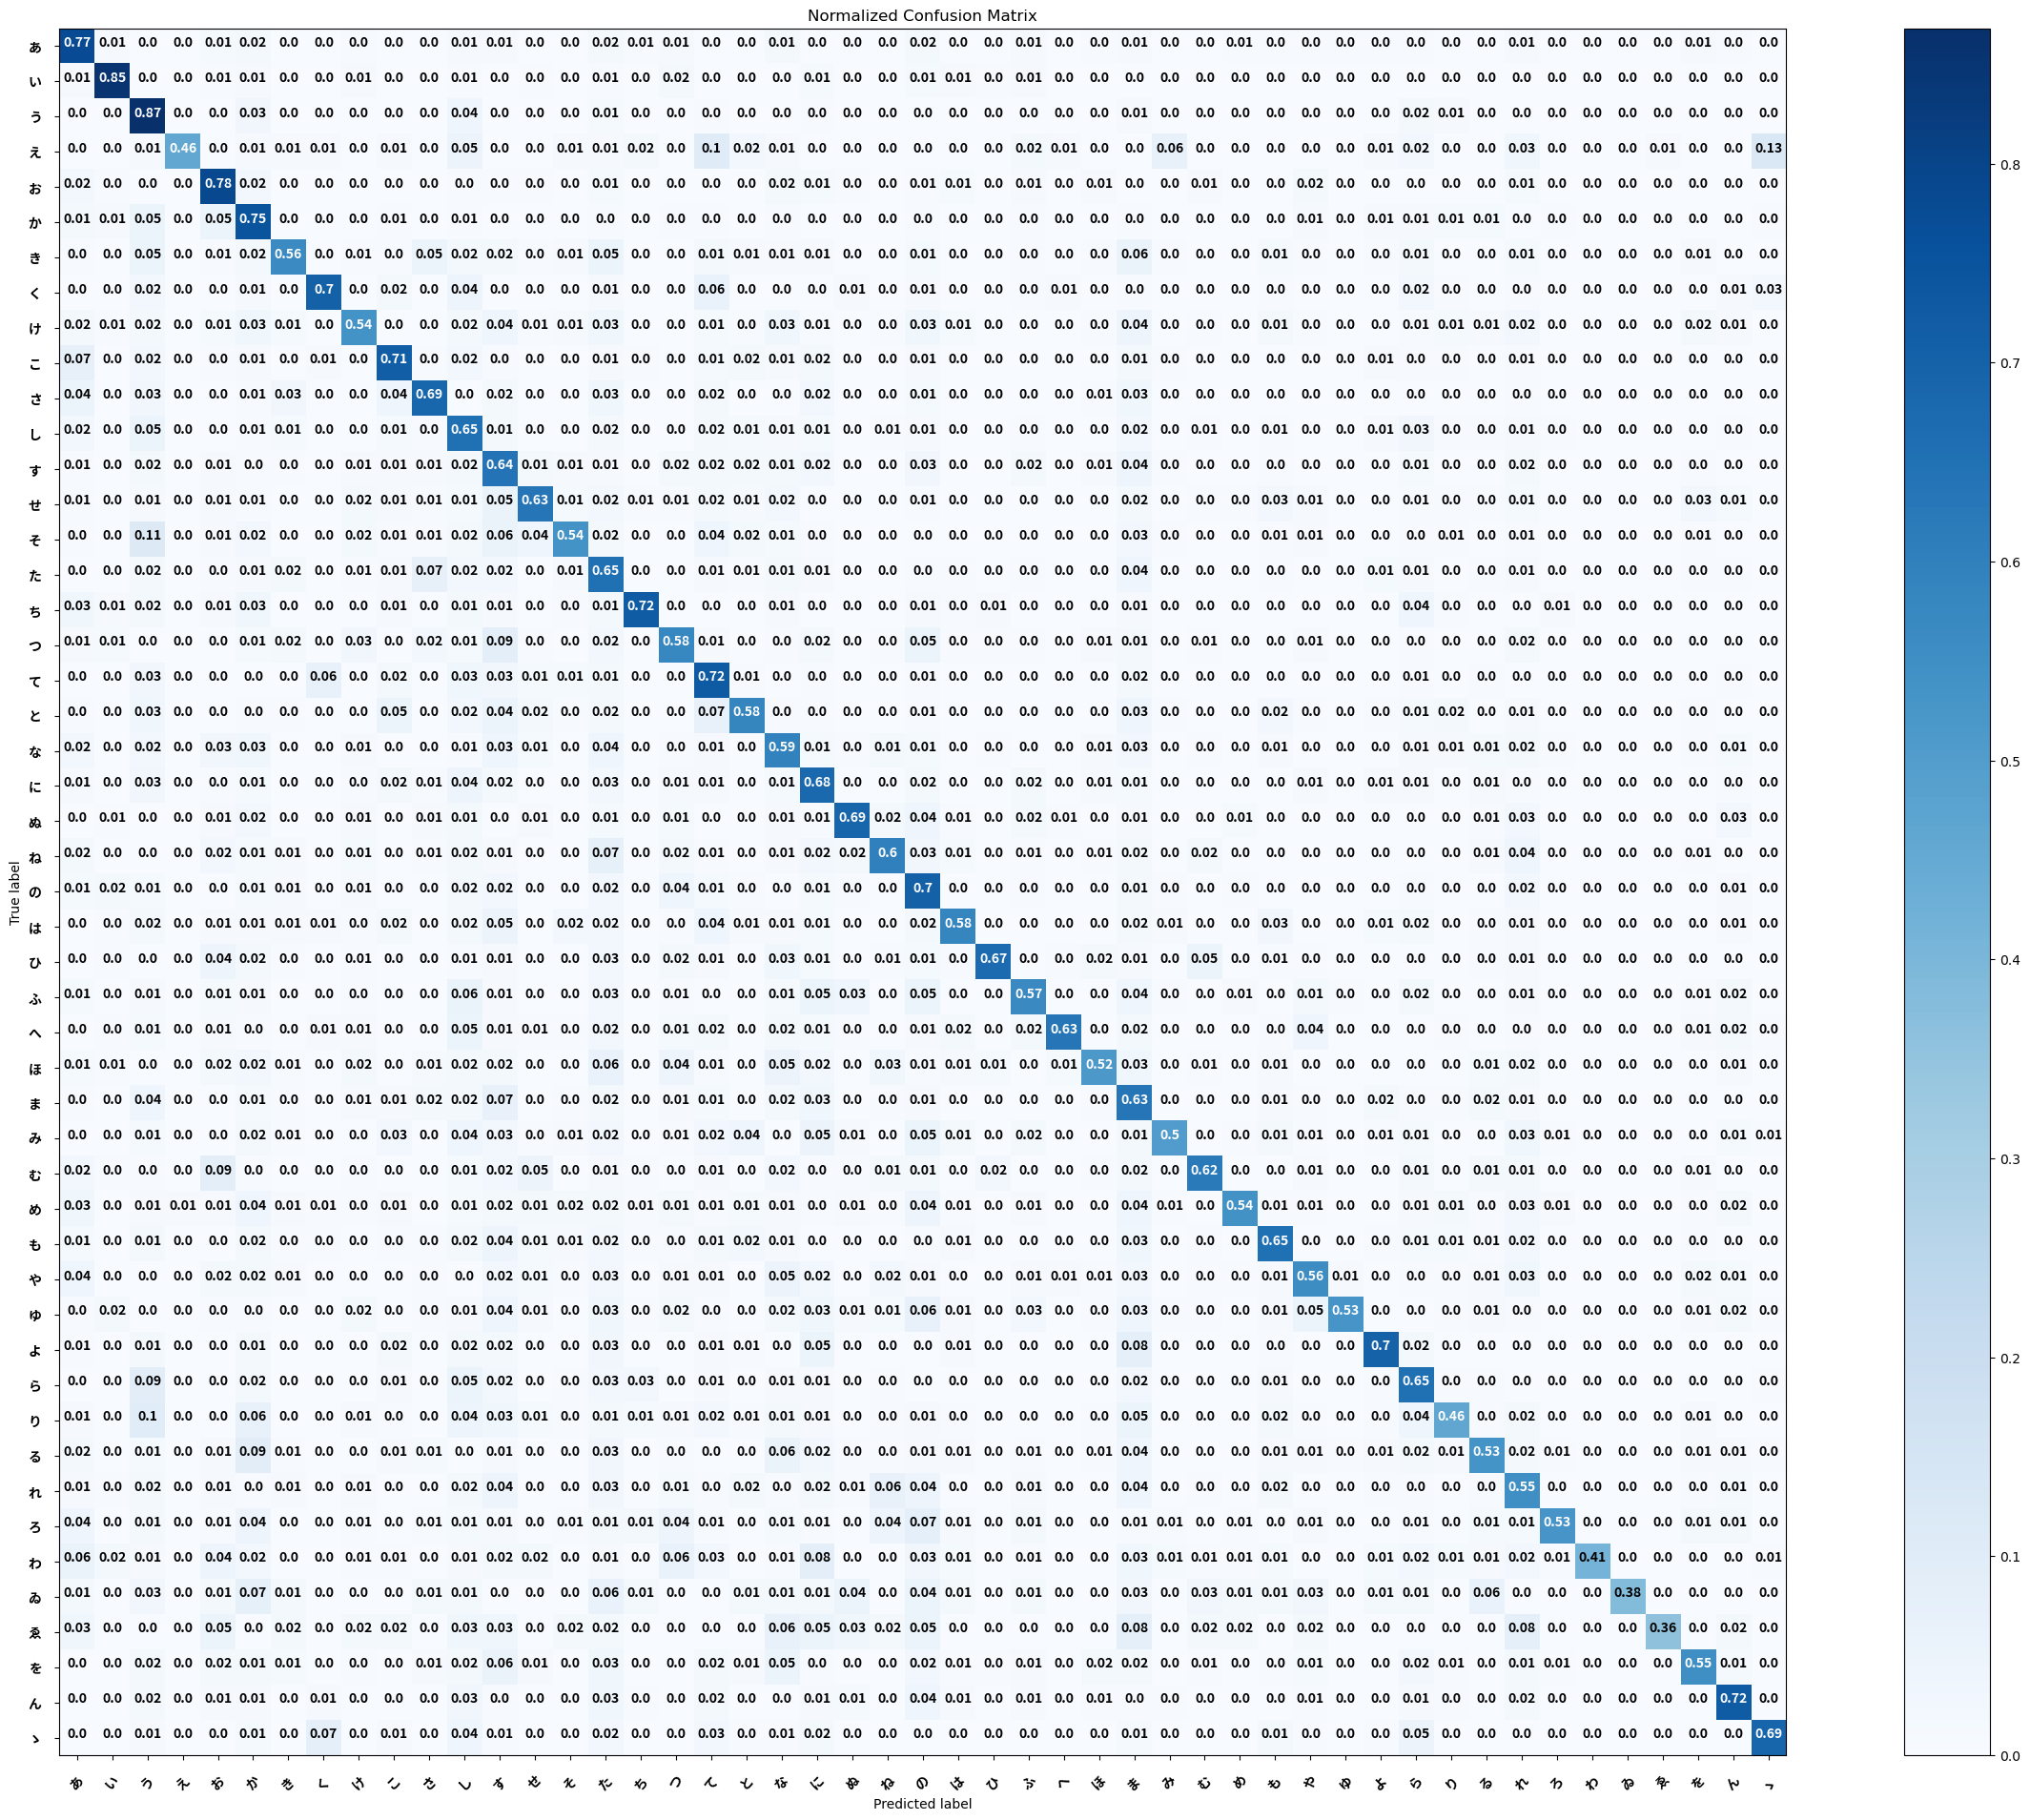

In [63]:
from matplotlib.font_manager import FontProperties
def plot_conf_matrix(cm, classes,
                     normalize=False,
                     title='Confusion matrix',
                     cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fp = FontProperties(fname="static/NotoSansJP-Bold.ttf")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.xticks(np.arange(len(classes)), classes, rotation=45, fontproperties=fp)
    plt.yticks(np.arange(len(classes)), classes, fontproperties=fp)

    plt.gca().tick_params(axis='x', which='major', pad=10)
    plt.gca().tick_params(axis='y', which='major', pad=10)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for (i, j), freq in np.ndenumerate(cm):
        plt.text(j, i, str(round(freq, 2)),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", 
                 fontproperties=fp)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
characters = list(get_class_translation_table().values())

plt.figure(figsize=(18,12))
cm = confusion_matrix(y_test, y_pred)
plot_conf_matrix(cm, classes=characters,
                 title='Confusion Matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(25,19))
plot_conf_matrix(cm, classes=characters, normalize=True,
                 title='Normalized Confusion Matrix')

plt.savefig("normalized_confusion_matrix_tm.png")